In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# !pip install -r /kaggle/input/stable-diff/requirements.txt

In [3]:
!wget -O /kaggle/working/v1-5-pruned-emaonly.ckpt "https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt"

--2025-03-05 12:15:30--  https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt
Resolving huggingface.co (huggingface.co)... 108.156.201.102, 108.156.201.58, 108.156.201.111, ...
Connecting to huggingface.co (huggingface.co)|108.156.201.102|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/66/6f/666f465fa70158515404e8de2c6bc6fe2f90c46f9296293aa14daededeb32c52/cc6cb27103417325ff94f52b7a5d2dde45a7515b25c255d8e396c90014281516?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27v1-5-pruned-emaonly.ckpt%3B+filename%3D%22v1-5-pruned-emaonly.ckpt%22%3B&Expires=1741180261&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0MTE4MDI2MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy82Ni82Zi82NjZmNDY1ZmE3MDE1ODUxNTQwNGU4ZGUyYzZiYzZmZTJmOTBjNDZmOTI5NjI5M2FhMTRkYWVkZWRlYjMyYzUyL2NjNmNiMjcxMDM0MTczMjVmZjk0ZjUyYjdhNWQyZGRlNDVhNzUxNWIyNWMyN

In [4]:
import sys
sys.path.insert(1, '/kaggle/input/stable-diff/sd')

In [5]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

In [6]:
DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

Using device: cpu


<ipython-input-6-96606d498c90>:8: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


In [7]:
tokenizer = CLIPTokenizer("/kaggle/input/stable-diff/vocab.json", merges_file="/kaggle/input/stable-diff/merges.txt")

In [8]:
model_file = "/kaggle/working/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)
models

{'clip': CLIP(
   (embedding): CLIPEmbedding(
     (token_embedding): Embedding(49408, 768)
   )
   (layers): ModuleList(
     (0-11): 12 x CLIPLayer(
       (layernorm_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
       (attention): SelfAttention(
         (in_proj): Linear(in_features=768, out_features=2304, bias=True)
         (out_proj): Linear(in_features=768, out_features=768, bias=True)
       )
       (layernorm_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
       (linear_1): Linear(in_features=768, out_features=3072, bias=True)
       (linear_2): Linear(in_features=3072, out_features=768, bias=True)
     )
   )
   (layernorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
 ),
 'encoder': VAE_Encoder(
   (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): VAE_ResidualBlock(
     (groupnorm_1): GroupNorm(32, 128, eps=1e-05, affine=True)
     (conv_1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [13]:
prompt = "A dog wearning a hat and goggles."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8

In [14]:
input_image = None
image_path = "/kaggle/input/stable-diff/dogi.jpg"
strength = 0.9

In [15]:
sampler = "ddpm"
num_inference_steps = 50
seed = 42

100%|██████████| 50/50 [16:27<00:00, 19.74s/it]


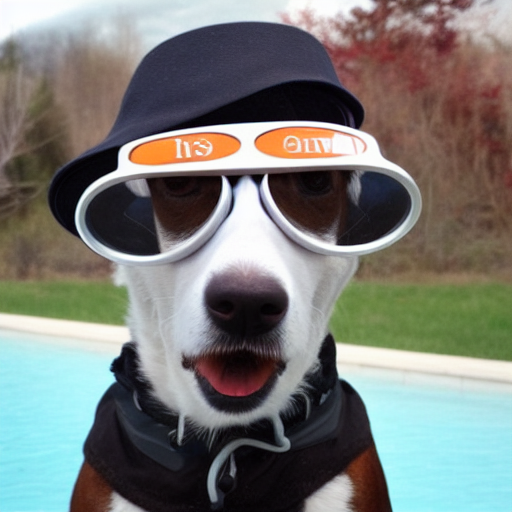

In [16]:
output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)